In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Datasets/Concrete Compressive Strength.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
## Getting a quick look of dataset

In [5]:
df.shape

(1030, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
df.isna().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64

In [9]:
## There are no null values so lets move on to the eda part.

<Axes: >

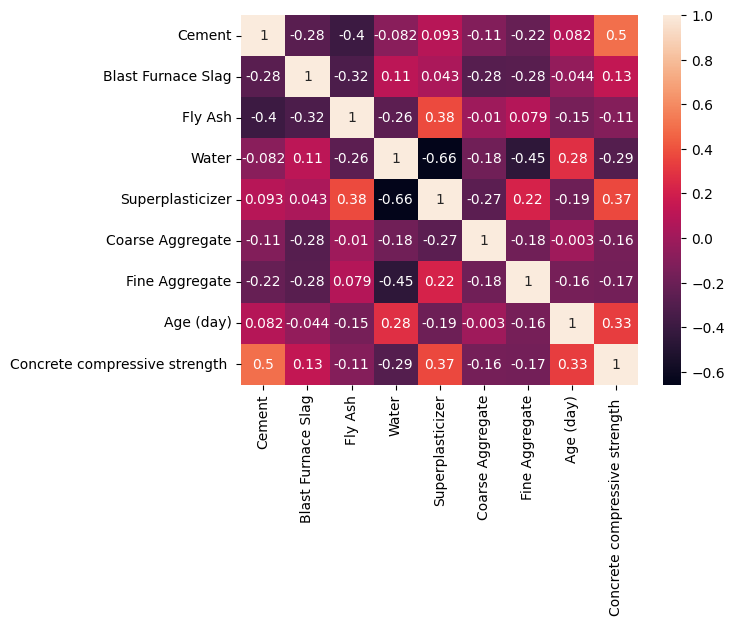

In [10]:
sns.heatmap(df.corr(), annot = True)

In [14]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength '],
      dtype='object')

In [15]:
## Spliting the dataset
X = df.drop("Concrete compressive strength ", axis = 1)
y = df["Concrete compressive strength "]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score

In [20]:
models = {
    "LinearRegression" : LinearRegression(),
    "SVM" : SVR(),
    "KNN" : KNeighborsRegressor(),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest" : RandomForestRegressor(), 
    "Adaboost" : AdaBoostRegressor(),
    "Gradient" : GradientBoostingRegressor(),
    "XGboost" : XGBRegressor()
}
models

{'LinearRegression': LinearRegression(),
 'SVM': SVR(),
 'KNN': KNeighborsRegressor(),
 'DecisionTree': DecisionTreeRegressor(),
 'RandomForest': RandomForestRegressor(),
 'Adaboost': AdaBoostRegressor(),
 'Gradient': GradientBoostingRegressor(),
 'XGboost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parall

In [23]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    print(f"{list(models.keys())[i]} training accuracy : {r2_score(y_train, y_pred_train) * 100}")
    print(f"{list(models.keys())[i]} testing accuracy : {r2_score(y_test, y_pred_test) * 100}")
    print("-" * 30)
    print("\n")

LinearRegression training accuracy : 61.04593527904933
LinearRegression testing accuracy : 62.75416055417096
------------------------------


SVM training accuracy : 68.22251499151312
SVM testing accuracy : 65.46959363029181
------------------------------


KNN training accuracy : 82.8003092744287
KNN testing accuracy : 71.89658324118986
------------------------------


DecisionTree training accuracy : 99.75417004090184
DecisionTree testing accuracy : 80.17890473846667
------------------------------


RandomForest training accuracy : 98.61786824960242
RandomForest testing accuracy : 87.92696216600372
------------------------------


Adaboost training accuracy : 82.01217466114494
Adaboost testing accuracy : 73.66003364849436
------------------------------


Gradient training accuracy : 94.96194763703599
Gradient testing accuracy : 88.07961396848876
------------------------------


XGboost training accuracy : 99.66963544787973
XGboost testing accuracy : 92.30751936238144
----------------

## Best performing models are XGboost and Gradientboost with accuracy 92.30% & 88.07%

In [37]:
model = XGBRegressor()
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [38]:
## Testing for new data
input_data = (212.07,0,121.62,180.31,5.69,1057.6,779.32,28)
input_arr = np.asarray(input_data)
input_arr = input_arr.reshape(1,-1)
prediction = model.predict(input_arr)
print(prediction)

[44.10723]
